## 알고리즘 원리

### 분류

- 가장 거리가 가까운 K개의 데이터의 레이블을 보고 다수를 차지하는 쪽을 레이블으로 사용
- 거리를 계산할 때 특성의 스케일에 영향을 받기 때문에 **특성 간의 스케일을 동일하게 맞춰야 함**

### 회귀



## 장점



## 단점

데이터가 아주 많은 경우 메모리가 많이 필요하고 거리 계산에 많은 시간 필요

## 모델 속성, 메서드, 파라미터

- `model._fit_X` : 학습한 X 데이터 저장
- `model._y` : 학습한 y 데이터 저장
- `model.kneighbors(샘플)` : 샘플에서 가장 가까운 이웃들의 **거리**와 **인덱스** 배열 반환
- KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=1) : 
    - n_neighbors=5 최근접이웃 개수
    - p=2 유클리디안 거리, p=1 맨해튼 거리
    - n_jobs=1 계산할 때 사용할 CPU 코어 개수, n_jobs=-1 모든 코어 사용    


In [11]:
import numpy as np
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

X = np.array([[i, j]for i, j in zip(bream_length + smelt_length, bream_weight + smelt_weight)])
y = np.array( [1]*35 + [0]*14)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
kn = KNeighborsClassifier().fit(X_train, y_train)
print('정확도 =', kn.score(X_test, y_test))
print('_fit_X에 저장된 학습한 X_train data 일부\n', kn._fit_X[:5])
print('_y에 저장된 학습한 y_train data 일부\n', kn._y[:5])

정확도 = 1.0
_fit_X에 저장된 학습한 X_train data 일부
 [[  41.   975. ]
 [  30.   390. ]
 [  14.3   19.7]
 [  37.  1000. ]
 [  26.5  340. ]]
_y에 저장된 학습한 y_train data 일부
 [1 1 0 1 1]


### 최근접 이웃을 산점도에 표시하기

최근접 이웃 리스트
 (array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
        138.32150953]]), array([[38, 31,  2, 35, 23]]))


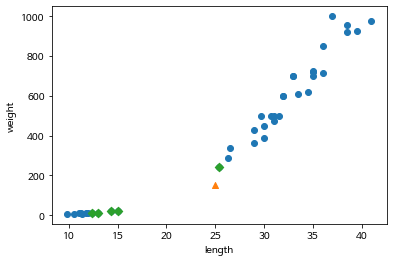

In [33]:
neighbors = kn.kneighbors([[25, 150]])
print('최근접 이웃 리스트\n', neighbors)
distance, index = neighbors

import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(X_train[index, 0], X_train[index, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

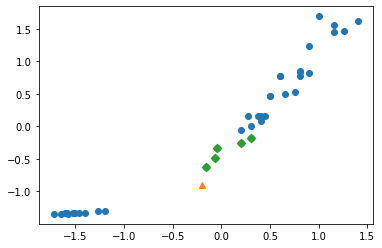

In [55]:
# 스케일을 맞춘 후 다시 산점도 그리기

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

kn2 = KNeighborsClassifier().fit(X_train_scaled, y_train)
new = sc.transform([[25, 150]])
neighbors2 = kn2.kneighbors(new)
distance2, index2 = neighbors2

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
plt.scatter(new[0][0], new[0][1], marker='^')
plt.scatter(X_train_scaled[index2, 0], X_train_scaled[index2, 1], marker='D')
plt.xticks(fontname = "DejaVu Sans") # 한글 폰트가 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.yticks(fontname = "DejaVu Sans")
plt.show()

## 출처

- 혼자 공부하는 머신러닝 딥러닝(박해선)